<h4><b>Автоматизированная система определения рыночной стоимости недвижимости</b></h4>

<h5>Шаг 1. Откройте файл с данными и изучите общую информацию</h5>

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [226]:
df = pd.read_csv('Данные.csv', sep = '\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<h5>Шаг 2. Предобработка данных</h5>

In [227]:
median_parks_around3000 = df['parks_around3000'].median()
median_parks_nearest = df['parks_nearest'].median()
median_ponds_around3000 = df['ponds_around3000'].median()
median_ponds_nearest = df['ponds_nearest'].median()
df['ponds_nearest'] = df['ponds_nearest'].fillna(median_ponds_nearest)
df['ponds_around3000'] = df['ponds_nearest'].fillna(median_ponds_around3000)
df['parks_nearest'] = df['ponds_nearest'].fillna(median_parks_nearest)
df['parks_around3000'] = df['ponds_nearest'].fillna(median_parks_around3000)
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(False)
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['first_day_exposition'] = df['first_day_exposition'].dt.date

for i in range(4):
    median_value = df.loc[df['rooms'] == i, 'living_area'].median()
    df.loc[df['rooms'] == i, 'living_area'] = median_value

df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,45.0,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,755.0,755.0,755.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,17.6,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,502.0,502.0,502.0,502.0,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,30.5,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,574.0,574.0,574.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,45.0,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,234.0,234.0,234.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,30.5,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,48.0,48.0,48.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,45.0,3,False,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,381.0,381.0,381.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,45.0,4,False,...,8.50,0.0,Тосно,NaN,NaN,502.0,502.0,502.0,502.0,45.0
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,30.5,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,502.0,502.0,502.0,502.0,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.5,12,False,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,196.0,196.0,196.0,196.0,602.0


<h5>Шаг 3. Посчитайте и добавьте в таблицу</h5>

1) цену квадратного метра;

In [228]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']

df['price_per_square_meter']=df['price_per_square_meter'].astype('int')
df['price_per_square_meter']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: price_per_square_meter, Length: 23699, dtype: int32

2) день недели, месяц и год публикации объявления;

In [229]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
df['day_of_week_exposition'] = df['first_day_exposition'].dt.day_name()
df['mouth_exposition']=df['first_day_exposition'].dt.month
df['year_exposition']=df['first_day_exposition'].dt.year

df[[ 'first_day_exposition', 'day_of_week_exposition', 'mouth_exposition', 'year_exposition']]


,first_day_exposition,day_of_week_exposition,mouth_exposition,year_exposition
0,2019-03-07,Thursday,3,2019
1,2018-12-04,Tuesday,12,2018
2,2015-08-20,Thursday,8,2015
3,2015-07-24,Friday,7,2015
4,2018-06-19,Tuesday,6,2018
...,...,...,...,...
23694,2017-03-21,Tuesday,3,2017
23695,2018-01-15,Monday,1,2018
23696,2018-02-11,Sunday,2,2018
23697,2017-03-28,Tuesday,3,2017


3) этаж квартиры; варианты — первый, последний, другой;

In [230]:
circs = [ 
    (df['floor']==1),
    (df['floor']==df['floors_total']),
]

values = ['первый', 'последний']

df['type_of_floor']=np.select(circs, values, default='другой')

df[['floor', 'floors_total','type_of_floor']]

,floor,floors_total,type_of_floor
0,8,16.0,другой
1,1,11.0,первый
2,4,5.0,другой
3,9,14.0,другой
4,13,14.0,другой
...,...,...,...
23694,3,5.0,другой
23695,4,5.0,другой
23696,1,3.0,первый
23697,12,17.0,другой


4) соотношение жилой и общей площади, а также отношение площади кухни к общей;

In [231]:
df['living_to_total_ratio'] = df['living_area']/df['total_area']
df['kitchen_to_total_ratio'] = df['kitchen_area']/df['total_area']

df[['living_to_total_ratio','kitchen_to_total_ratio']]

,living_to_total_ratio,kitchen_to_total_ratio
0,0.416667,0.231481
1,0.435644,0.272277
2,0.544643,0.148214
3,0.283019,NaN
4,0.305000,0.410000
...,...,...
23694,0.336298,0.103356
23695,0.762712,0.144068
23696,0.537919,NaN
23697,0.397394,0.303583


<h5>Шаг 4. Проведите исследовательский анализ данных и выполните инструкции</h5>

<b>1) Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.</b>

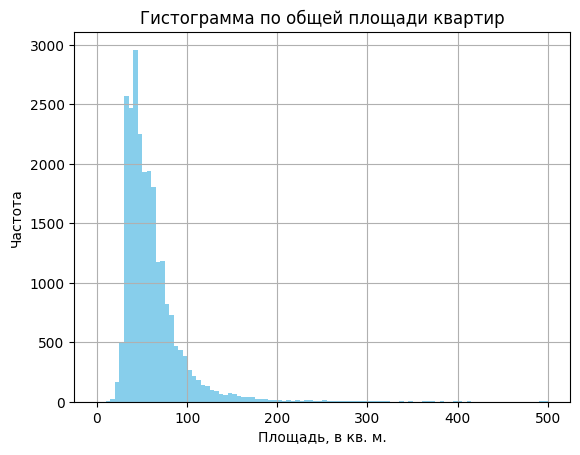

In [232]:
plt.hist(df['total_area'], bins=100, range=(0, 500), color='skyblue')
plt.title('Гистограмма по общей площади квартир')
plt.xlabel('Площадь, в кв. м.')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


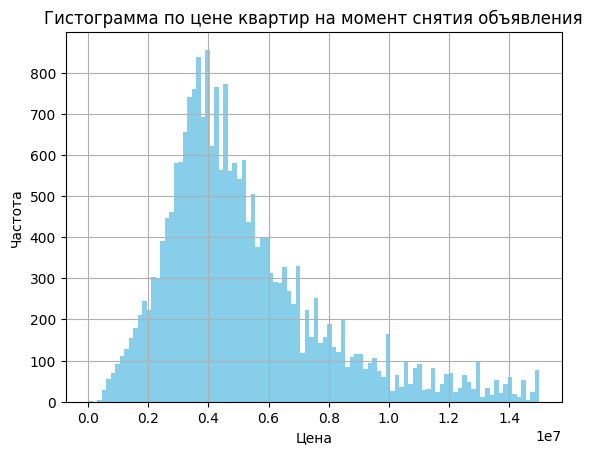

In [233]:
plt.hist(df['last_price'], bins=100, range=(0, 15000000), color='skyblue')
plt.title('Гистограмма по цене квартир на момент снятия объявления')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


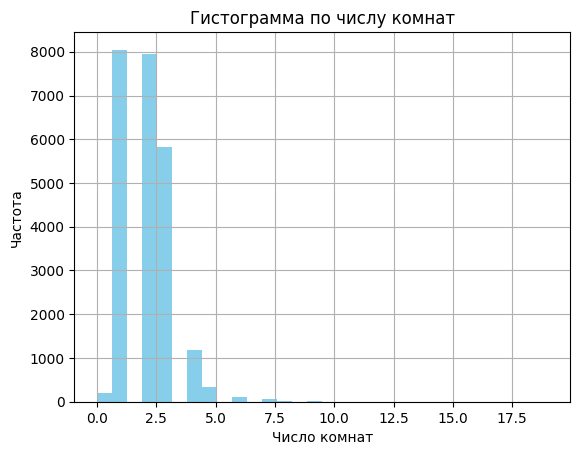

In [234]:
plt.hist(df['rooms'], bins=30, color='skyblue') 
plt.title('Гистограмма по числу комнат')
plt.xlabel('Число комнат')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

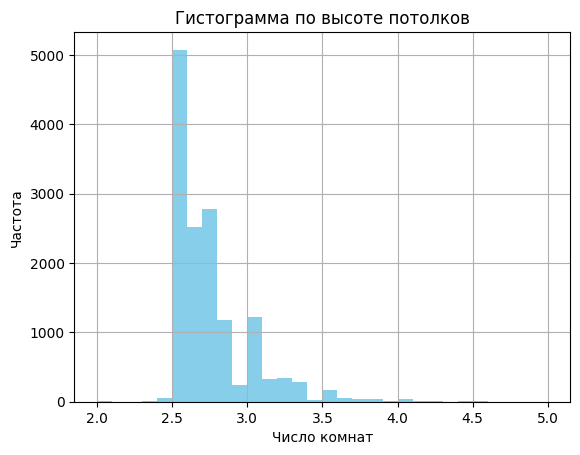

In [235]:
plt.hist(df['ceiling_height'], bins=30, range= (2,5), color='skyblue') 
plt.title('Гистограмма по высоте потолков')
plt.xlabel('Число комнат')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

<b>2) Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа.</b>

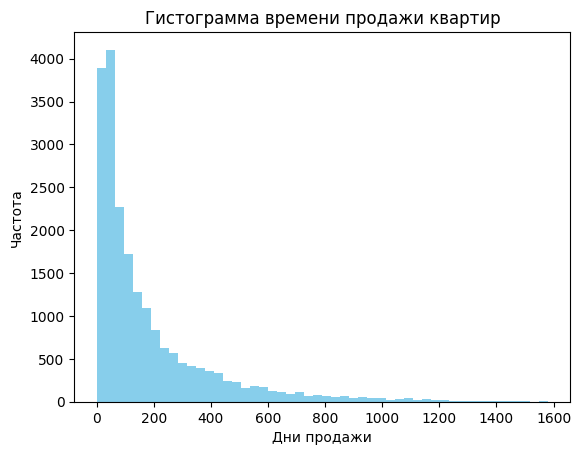

Среднее время продажи: 180.89 дней
Медианное время продажи: 95.0 дней


In [236]:
plt.hist(df['days_exposition'], bins=50, color='skyblue')
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('Дни продажи')
plt.ylabel('Частота')
plt.show()

# Находим среднее времени продажи квартир и медиану
mean_days = df['days_exposition'].mean()
median_days = df['days_exposition'].median()

print(f'Среднее время продажи: {mean_days:.2f} дней')
print(f'Медианное время продажи: {median_days} дней')

Судя по гистограмме, среднее время продажи квартир составляет 180 дней, в то время как медианное значение равно 95 дням, что указывает на то, что большинство квартир продается относительно быстро, но существуют выбросы с длительным временем продажи.

<b>3) Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.</b>

Для удаления выбросов в данных по времени продажи будем использовать алгоритм на основе интерквартильного размаха (IQR). 
- Верхний квартиль – это такая оценка, выше которой только 25% оценок.
- Нижний квартиль – это такое значение, ниже которого только 25% оценок.
- Межквартильный размах (IQR) – это разница между 75% и 25% квартилем. Внутри этого диапазона лежит 50% наблюдений. 

In [237]:
Q1 = df['days_exposition'].quantile(0.25)
Q3 = df['days_exposition'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = df[(df['days_exposition'] >= lower_bound) & (df['days_exposition'] <= upper_bound)]

print(f"Были удалены выбросы в данных по времени продажи. Нижняя граница: {lower_bound}, верхняя граница: {upper_bound}.")


Были удалены выбросы в данных по времени продажи. Нижняя граница: -235.5, верхняя граница: 512.5.


Теперь сравним время продажи до и после удаления выбросов.

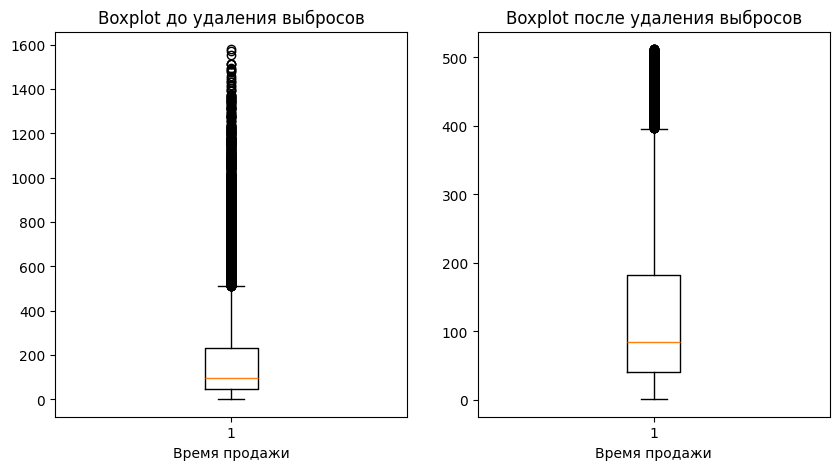

Статистики до удаления выбросов:
count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Статистики после удаления выбросов:
count    18849.000000
mean       128.753886
std        121.531193
min          1.000000
25%         41.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64


In [238]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['days_exposition'].dropna())
plt.title('Boxplot до удаления выбросов')
plt.xlabel('Время продажи')

plt.subplot(1, 2, 2)
plt.boxplot(filtered_data['days_exposition'].dropna())
plt.title('Boxplot после удаления выбросов')
plt.xlabel('Время продажи')

plt.show()

print("Статистики до удаления выбросов:")
print(df['days_exposition'].describe())

print("\nСтатистики после удаления выбросов:")
print(filtered_data['days_exposition'].describe())


После удаления выбросов в данных о времени продажи квартир, наблюдаются следующие изменения в статистиках:

До удаления выбросов:
- Среднее время продажи составляло 180.89 дней.
- Медианное время продажи было равно 95 дням.
- 75% квартир продавались в течение 232 дней, что является верхним квартилем.

После удаления выбросов:
- Среднее время продажи уменьшилось и составило 128.75 дней.
- Медианное время продажи также уменьшилось и стало равным 85 дням.
- 75% квартир продается в течение 183 дней.

Выводы:
- Удаление выбросов сократило среднее и медианное время продажи, что указывает на то, что выбросы в виде очень долгих продаж влияли на среднее значение.
- Медианное значение осталось близким к среднему, что может свидетельствовать о том, что распределение времени продажи стало более симметричным.
- Уменьшение значения 75% квартиля после удаления выбросов указывает на сокращение времени продажи для большинства квартир.

<b>4) Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года. Постройте графики.</b>

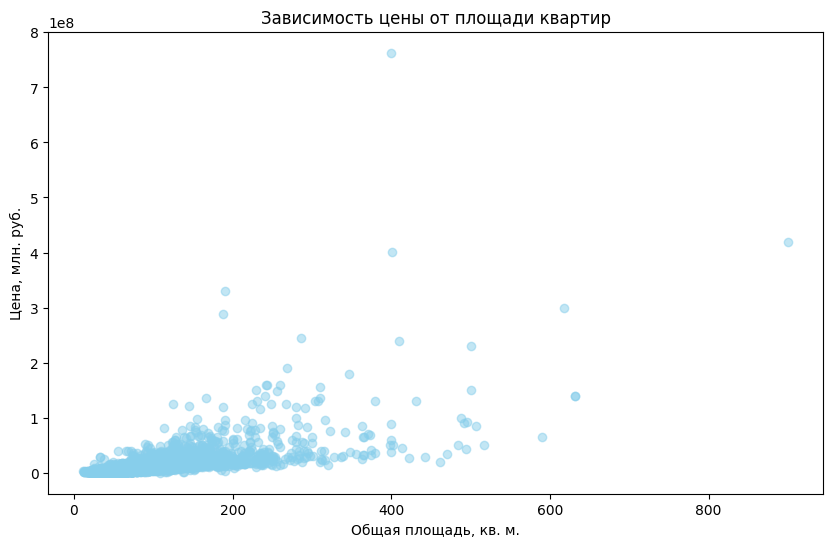

In [239]:
plt.figure(figsize=(10, 6))

plt.scatter(df['total_area'], df['last_price'], alpha=0.5, color='skyblue')

plt.title('Зависимость цены от площади квартир')
plt.xlabel('Общая площадь, кв. м.')
plt.ylabel('Цена, млн. руб.')

plt.show()

Из графика можно сделать вывод, что зависимость цены от общей площади слабая, но есть - с увеличением площади растет и стоимость.

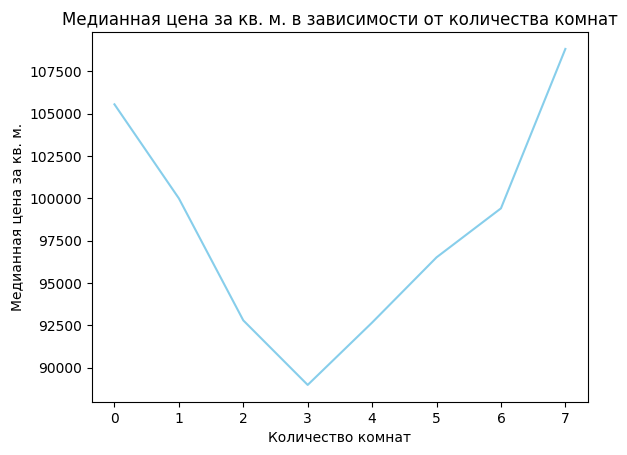

In [248]:
pivot_table_week = df.pivot_table(index='rooms', values='price_per_square_meter', aggfunc=['mean', 'count', 'median'])
pivot_table_week.columns = ['mean', 'count', 'median']

filtered_pivot_table = pivot_table_week.query('count > 30')
filtered_pivot_table.plot(y='median', color='skyblue', legend=False)

plt.title('Медианная цена за кв. м. в зависимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена за кв. м.')

plt.show()




Из графика видно, что чем ближе количество комнат к трем, тем ниже цена кв. м.

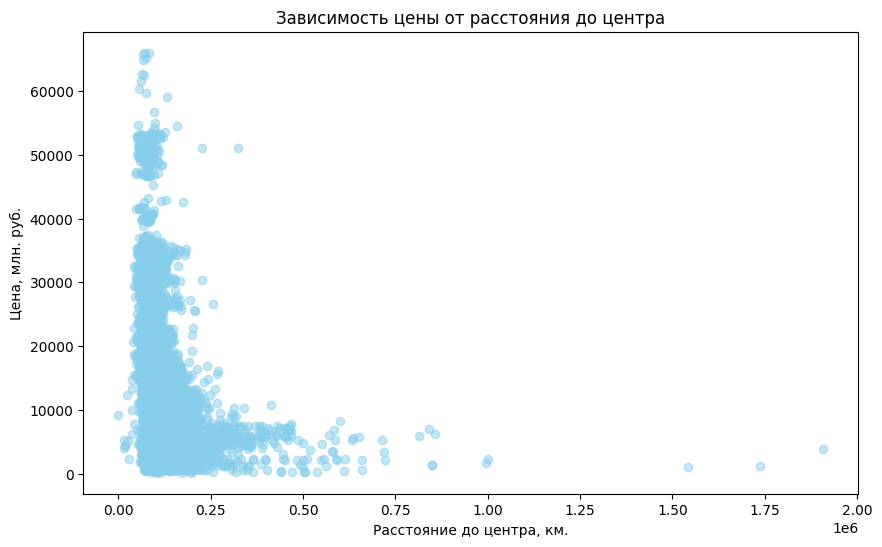

In [241]:
plt.figure(figsize=(10, 6))

plt.scatter(df['price_per_square_meter'], df['cityCenters_nearest'], alpha=0.5, color='skyblue')

plt.title('Зависимость цены от расстояния до центра')
plt.xlabel('Расстояние до центра, км.')
plt.ylabel('Цена, млн. руб.')

plt.show()

Из графика видна явная зависимость цены кв. м. от расстояния до центра - чем ближе к центру, тем выше цена.

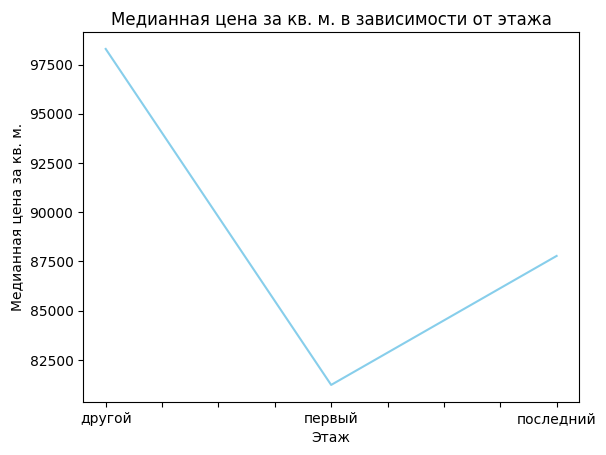

In [242]:
pivot_table_floor = df.pivot_table(index='type_of_floor', values='price_per_square_meter', aggfunc=['mean', 'count', 'median'])
pivot_table_floor.columns = ['mean', 'count', 'median']

pivot_table_floor.plot(y='median', color='skyblue', legend=False)

plt.title('Медианная цена за кв. м. в зависимости от этажа')
plt.xlabel('Этаж')
plt.ylabel('Медианная цена за кв. м.')

plt.show()


Из графика видно, что цена квартиры на первом этаже в среднем ниже, чем на последнем и другом этаже. Большую же стоимость имеют квартиры, расположенные на этажах, отличных от первого и последнего.

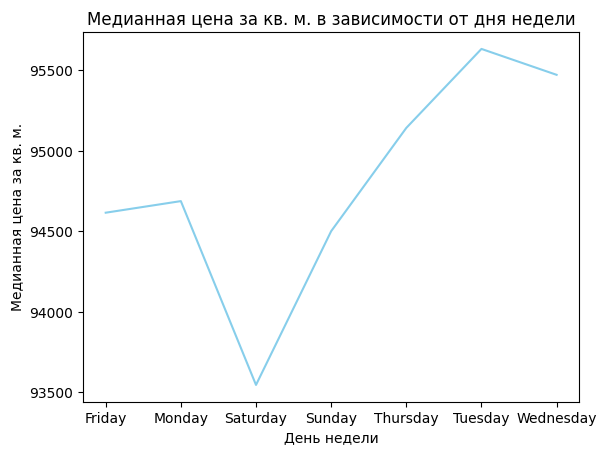

In [243]:
pivot_table_week = df.pivot_table(index='day_of_week_exposition', values='price_per_square_meter', aggfunc=['mean', 'count', 'median'])
pivot_table_week.columns = ['mean', 'count', 'median']

pivot_table_week.plot(y='median', color='skyblue', legend=False)

plt.title('Медианная цена за кв. м. в зависимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Медианная цена за кв. м.')

plt.show()

Из графика можно сделать вывод, что цены на квартиры, объявления которых были выложены во вторник гораздо ниже, чем в другие дни недели.

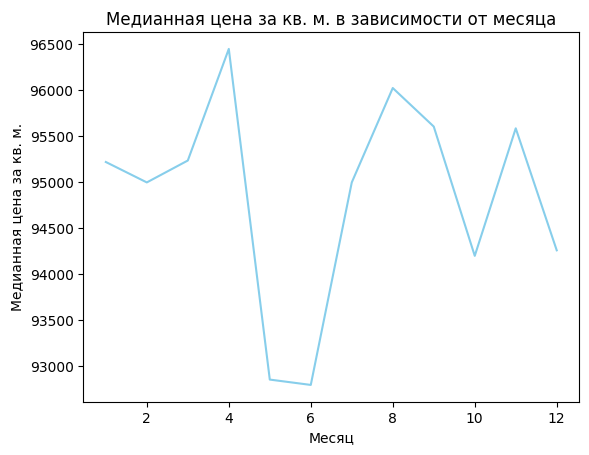

In [244]:
pivot_table_mouth = df.pivot_table(index='mouth_exposition', values='price_per_square_meter', aggfunc=['mean', 'count', 'median'])
pivot_table_mouth.columns = ['mean', 'count', 'median']

pivot_table_mouth.plot(y='median', color='skyblue', legend=False)

plt.title('Медианная цена за кв. м. в зависимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Медианная цена за кв. м.')

plt.show()

Из графика можно сделать вывод, что самая низкая стоимость у квартир, объявления которых были выложены в мае и июне, а сама высокая - в апреле и августе.

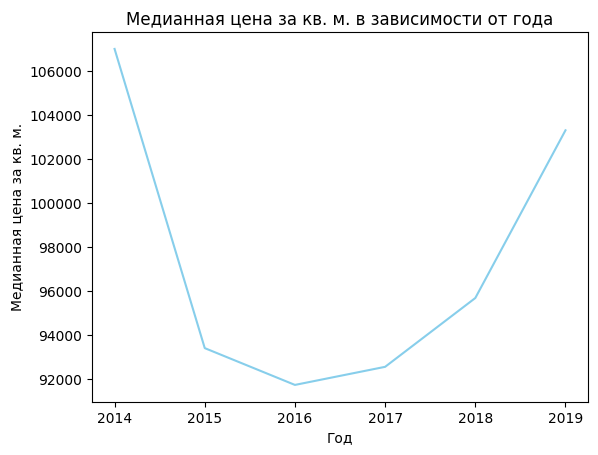

In [245]:
pivot_table_year = df.pivot_table(index='year_exposition', values='price_per_square_meter', aggfunc=['mean', 'count', 'median'])
pivot_table_year.columns = ['mean', 'count', 'median']

pivot_table_year.plot(y='median', color='skyblue', legend=False)

plt.title('Медианная цена за кв. м. в зависимости от года')
plt.xlabel('Год')
plt.ylabel('Медианная цена за кв. м.')

plt.show()

По графику видно, что стоимость квартир падала в 2014-2016 годах, но после стала резко возрастать.

<b>5) Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.</b>

In [251]:
top_localities = df['locality_name'].value_counts().head(10).index

top_loc = df[df['locality_name'].isin(top_localities)]

top_loc = top_loc.groupby('locality_name')['price_per_square_meter'].mean()

max_price = top_loc.idxmax()
min_price = top_loc.idxmin()

print("Средняя цена за кв. м. в топ 10 населенных пунктах:")
print(top_loc)

print("\nНаселённый пункт с самой высокой стоимостью жилья:", max_price)
print("Населённый пункт с самой низкой стоимостью жилья:", min_price)


Средняя цена за кв. м. в топ 10 населенных пунктах:
locality_name
Всеволожск            68654.007538
Выборг                58141.489451
Гатчина               68745.693811
Колпино               75424.150888
Пушкин               103125.373984
Санкт-Петербург      114848.565231
деревня Кудрово       92473.086957
посёлок Мурино        85751.733716
посёлок Парголово     90175.489297
посёлок Шушары        78676.904545
Name: price_per_square_meter, dtype: float64

Населённый пункт с самой высокой стоимостью жилья: Санкт-Петербург
Населённый пункт с самой низкой стоимостью жилья: Выборг
